*Import libraries*

In [ ]:
#Import Libraries
import pandas as pd
from matplotlib import pyplot as plt
import os
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

Mounted at /content/gdrive


*1. Use K Means Cluster Analysis*

In [ ]:
#Read in Red Wine data
red = pd.read_csv('/content/gdrive/My Drive/winequality-red.csv', sep = ';')
red.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [ ]:
#Preprocessing Data: Scale data and convert to a pandas dataframe
x_scaled = pd.DataFrame(scale(red), index=red.index, columns=red.columns)

Text(0.5, 1.0, 'Elbow curve')

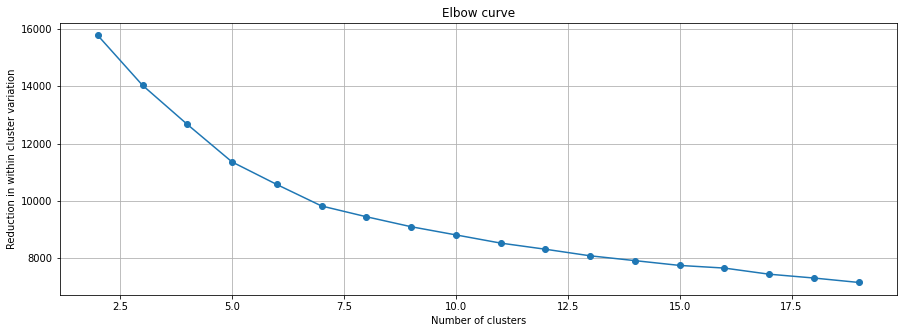

In [ ]:
#Determine ideal number of clusters using elbow method

#Create empty list
within_cluster_var = []

#Create models for the range of Ks from 2 to 20
for k in range(2, 20):
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(x_scaled)
  within_cluster_var.append(kmeans.inertia_)

#Plot the elbow curve
fig = plt.figure(figsize = (15,5))
plt.plot(range(2, 20), within_cluster_var, marker = 'o')
plt.grid(True) #Turn grid on
plt.xlabel('Number of clusters')
plt.ylabel('Reduction in within cluster variation')
plt.title('Elbow curve')

In [ ]:
#Instantiate K Means, with ideal K set to 5
km = KMeans(n_clusters = 5, random_state = 0)
#Fit k means model
km.fit(x_scaled)
#Add labels to original data
x_scaled['cluster'] = km.labels_
#Grouping by cluster, and get column means for each cluster
display(x_scaled.groupby('cluster').mean()) #cluster means are centered at 0


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
0,-0.077872,0.086577,0.098633,0.436558,0.027587,1.090805,1.381519,0.385753,-0.153244,-0.187230,-0.616832,-0.462056
1,-0.483685,0.675532,-0.791517,-0.231587,-0.078366,-0.401776,-0.384522,-0.095559,0.409664,-0.419668,-0.425757,-0.465275
2,-0.599699,-0.485038,-0.108176,-0.221834,-0.380796,0.184010,-0.201640,-1.139002,0.528551,0.200265,1.215054,0.832554
3,1.367270,-0.674977,1.140048,0.198292,-0.014903,-0.538583,-0.523448,0.833230,-0.841194,0.330386,0.172104,0.402409
4,0.065322,0.010313,1.104160,-0.408285,5.523137,-0.086857,0.500700,0.180551,-1.674547,3.624492,-0.888281,-0.374932


In my analysis, I recieved 2 clusters where the wine quality is high (quality > 0), and 3 clusters where wine quality is low (< 0). Clusters with higher wine quality consistently have higher alcohol content, higher sulphates, lower volatile acidity, and lower total sulfur dioxide. In contrast, clusters with lower wine quality tend to have lower alcohol content and higher volatile acidity. 

So based on these observations, to make a good bottle of wine, you should be increasing alcohol content, and sulphates, while decreasing volatile acidity. But the focus of making a good wine should be mostly on increasing alcohol content and lowering volatile acidity.

*2. Hierarchical Cluster Analysis*

In [ ]:
#Instantiate Hierarchical Clustering
ac = AgglomerativeClustering(n_clusters = 5,
                            affinity='euclidean',
                            linkage='complete') #set linkage to complete
#print out cluster assignments
labels = ac.fit_predict(x_scaled)
labels

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
ac = AgglomerativeClustering(n_clusters = 5,
                            affinity='euclidean',
                            linkage='complete')
#Fit ac
ac.fit(x_scaled)
#Add labels to original data
x_scaled['cluster'] = ac.labels_
#Get individual column means for each cluster
display(x_scaled.groupby('cluster').mean()) #cluster means are centered at 0


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
0,1.117620,-0.349720,1.004432,-0.095057,1.470947,-0.269898,0.035390,0.800639,-1.292270,1.717645,-0.341875,0.114017
1,-0.088200,0.035595,-0.090699,-0.064045,-0.133744,0.005247,-0.019843,-0.077709,0.111066,-0.140651,0.030863,-0.010170
2,0.284822,-0.598039,0.630946,6.832574,0.639140,0.982981,0.505067,1.903286,-0.500635,0.115332,-0.599218,0.069719
3,0.074897,-0.350945,3.127368,0.043416,11.116408,0.394484,0.320274,0.770280,-2.663717,5.735193,-0.960246,-1.407158
4,-0.624115,-1.291336,1.364336,5.293553,-0.675866,3.167777,5.956069,-1.185471,-1.259873,-0.815259,1.136122,1.276629


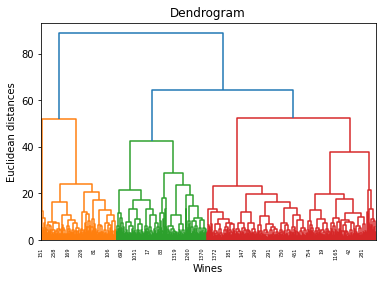

In [ ]:
#Build a Dendrogram

dendrogram = sch.dendrogram(sch.linkage(x_scaled, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Wines')
plt.ylabel('Euclidean distances')
plt.locator_params(axis='x', nbins=25)
plt.show()

In the hierarchichal cluster analysis, I recieved 3 clusters with high wine quality, and 2 clusters with lower wine quality. My conclusion with the hierarchical clusters has changed a bit compared to the k-means. While the high quality wines once again have low volatile acidity, like in k means clustering, my hierarchical analysis shows lower alcohol content for 2 of the clusters with higher quality wines, rendering the variable of alcohol content less significant of an indicator of wine quality. Furthermore, this hierarchical clusters show a positive relationship between citric acid and higher quality wines, which the k-means clusters did not show. 

Based on this analysis, lower quality wines tended to have high free sulfur dioxide (for both clusters w/negative values in wine quality, free sulfur dioxide is a positive value).

Thus in conclusion, I believe that to make a high quality wine based on just the hierarchical analysis, it is important to increase citric acid, and lower volatile acidity. 

But to make a high quality wine based on both cluster analyses, I would focus on lowering volatile acidity.

*3. Reducing data dimensionality using Principal Components Analysis*

In [ ]:
#Scale data
x = pd.DataFrame(scale(red), index = red.index, columns = red.columns)
#Fit on scaled data and print out the loadings in matrix form
PCA().fit(x).components_.T

array([[ 0.48788336, -0.00417321, -0.16482854, -0.23109808, -0.07877938,
         0.0555313 , -0.30721496,  0.20052866, -0.17457815, -0.18295601,
        -0.25643792,  0.63857976],
       [-0.26512898,  0.33896786, -0.22708884,  0.04185824,  0.29937933,
         0.297287  , -0.62623369,  0.14612614, -0.06022334,  0.15510563,
         0.37716123,  0.00466168],
       [ 0.47333547, -0.1373581 ,  0.10022856, -0.0567358 , -0.12014871,
         0.13663328,  0.24414858,  0.29633271, -0.22097505,  0.34608556,
         0.62432783, -0.07003691],
       [ 0.13915442,  0.16773634,  0.24362014, -0.38303758,  0.70936319,
         0.10931059,  0.28385429, -0.17062614,  0.27818728, -0.05223656,
         0.08807787,  0.18364637],
       [ 0.19742679,  0.18978819, -0.02660785,  0.65477782,  0.26623723,
         0.33733656,  0.23054697, -0.18692254, -0.41993639, -0.00386273,
        -0.20861667,  0.05393118],
       [-0.04588071,  0.25948314,  0.61611132, -0.03371148, -0.15941286,
        -0.04264807, -

In [ ]:
#Get Loadings, transposing the data, and visualize the loadings for PCs: V1, v2....v12 in a table form
pca_loadings = pd.DataFrame(PCA().fit(x).components_.T, index = red.columns, columns = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12'])
pca_loadings

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12
fixed acidity,0.487883,-0.004173,-0.164829,-0.231098,-0.078779,0.055531,-0.307215,0.200529,-0.174578,-0.182956,-0.256438,0.638580
volatile acidity,-0.265129,0.338968,-0.227089,0.041858,0.299379,0.297287,-0.626234,0.146126,-0.060223,0.155106,0.377161,0.004662
citric acid,0.473335,-0.137358,0.100229,-0.056736,-0.120149,0.136633,0.244149,0.296333,-0.220975,0.346086,0.624328,-0.070037
residual sugar,0.139154,0.167736,0.243620,-0.383038,0.709363,0.109311,0.283854,-0.170626,0.278187,-0.052237,0.088078,0.183646
chlorides,0.197427,0.189788,-0.026608,0.654778,0.266237,0.337337,0.230547,-0.186923,-0.419936,-0.003863,-0.208617,0.053931
free sulfur dioxide,-0.045881,0.259483,0.616111,-0.033711,-0.159413,-0.042648,-0.138260,-0.019356,-0.318000,-0.585389,0.237933,-0.051922
total sulfur dioxide,0.004067,0.363971,0.540732,-0.028460,-0.218453,0.115954,-0.110209,0.089897,0.121823,0.589188,-0.355047,0.069793
density,0.370301,0.330781,-0.168723,-0.200693,0.208793,-0.425667,-0.122546,0.079500,-0.249074,0.043538,-0.231453,-0.566645
pH,-0.432721,-0.065440,0.069771,-0.005466,0.257647,-0.480354,0.185692,0.314693,-0.461916,0.207610,-0.005599,0.341230
sulphates,0.254535,-0.109334,0.212913,0.560502,0.214835,-0.403743,-0.233402,0.275492,0.452689,-0.071919,0.097637,0.067793


In [ ]:
#Fit PCA model and transform X to get the PCs
pca = PCA()
plot = pd.DataFrame(pca.fit_transform(x), columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])
plot

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-1.779442,1.157303,-1.386581,-0.044944,0.233885,-0.976983,-0.110528,0.040320,-0.294420,0.073112,-0.262937,0.048362
1,-1.004185,2.071838,0.007759,0.466119,0.182454,0.657775,-1.376790,-0.176714,0.587342,-0.565736,0.048784,-0.139565
2,-0.915783,1.393434,-0.699286,0.345292,0.095210,0.254823,-0.720338,-0.088687,0.546495,-0.162065,-0.199140,-0.120391
3,2.404077,-0.213792,0.066381,-0.889182,-1.524742,-0.132218,0.200660,-0.202816,-0.506212,0.241135,-0.107616,0.319764
4,-1.779442,1.157303,-1.386581,-0.044944,0.233885,-0.976983,-0.110528,0.040320,-0.294420,0.073112,-0.262937,0.048362
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-2.241991,0.599594,0.795827,0.441059,-0.312981,0.130820,0.291926,0.137412,-0.421817,-1.016843,0.312767,-0.058920
1595,-2.122456,-0.370101,2.138539,0.454564,0.104124,-0.751228,-0.436849,0.181539,-0.413852,-0.992136,0.465027,-0.240933
1596,-1.366265,-0.517561,1.250696,0.514505,0.195916,-0.552162,-0.196039,-0.121154,-0.107569,-0.752854,0.235266,-0.402292
1597,-2.367147,0.703545,0.899482,0.661956,0.021380,-0.805753,0.126669,0.607400,-0.378298,-0.723453,0.737253,0.036187


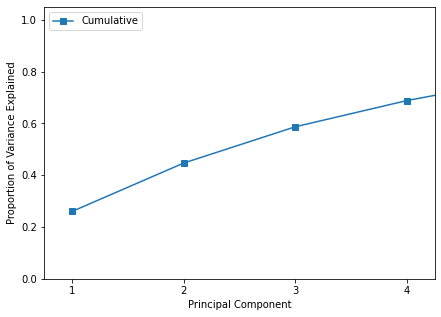

In [ ]:
#Visualize (cumulative) proportion of variance explained
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12], np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Cumulative Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.legend(loc=2);

Based on the scree plot, roughly 45% of the variation in my data can be explained by the first 2 components. 

With PCA for supervised machine learning, you can use the proportion of variance to determine how much variance, aka principal components, to get rid of (in this case it would be 2). Then, we can take a look at the loading scores for both components and decide which features to keep - this can be determined by looking at the magnitudes of each feature within each component. The greater the magnitude of a feature, the more "meaningful" a feature is for the variance that we have, and we should keep the more meaningful features and expect to not include the less significant features in the new dataset. With this new dataset, we can then perform model experimentation with supervised machine learning methods to predict which wines will be greater/lower in price based on the new features.